# linear basis function

pattern recognition and machine learning - Bishop - chapter 3.1

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams.update({'font.size': 16}) 

import numpy as np


In [2]:
def gen_data(x):
    y = x * np.sin(x*10) + 1 
    y += np.random.uniform(0, 0.1, size=(len(y)))
    return y

In [3]:
# generate some fake data
x = np.linspace(-1, 1, 100)
# x = x[::6]
y = gen_data(x)

x = x.reshape(-1, 1)

In [183]:
# validation data
x_val = np.arange(-1, 1, 0.001)
y_val = gen_data(x_val)

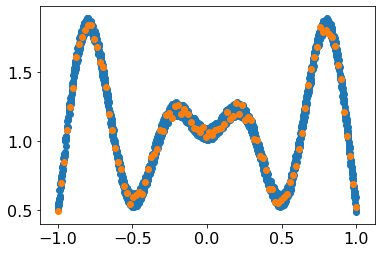

In [185]:
plt.figure()
plt.scatter(x_val, y_val)
plt.scatter(x, y)

In [5]:
def make_poly_basis(x, degree):
    poly = []
    for deg in range(degree):
        poly.append(x**deg)
        
    # shape should be NxM where N is the number of samples
    # and M are the number of bases
    return np.array(poly).T

In [6]:
def make_rbf_basis(x, mus, s):
    
    def gauss(x, mu, s):
        return np.exp( -(x-mu)**2/ (2*s**2) )
    
    basis = []
    for mu in mus:
        basis.append( gauss(x, mu, s) )
        
    # shape should be NxM where N is the number of samples
    # and M are the number of bases
    return np.array(basis).T

In [7]:
poly = make_poly_basis(x.reshape(-1), 40)

In [162]:
rbf = make_rbf_basis(x.reshape(-1), np.linspace(-1,1,10), 0.3)

In [163]:
rbf.shape

(100, 10)

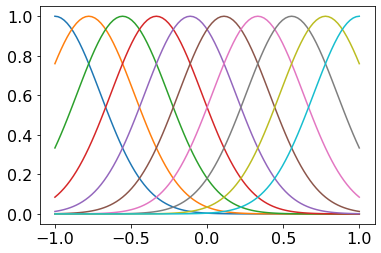

In [164]:
plt.figure()
for i in range(rbf.shape[1]):
    plt.plot(x, rbf[:,i])

In [165]:
poly.shape

(100, 40)

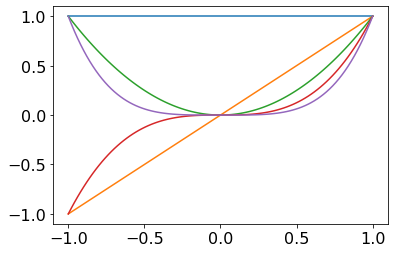

In [166]:
plt.figure()
plt.plot(x, poly[:,0])
plt.plot(x, poly[:,1])
plt.plot(x, poly[:,2])
plt.plot(x, poly[:,3])
plt.plot(x, poly[:,4])

In [167]:
poly.shape

(100, 40)

In [168]:
def solve(basis, y, method='direct'):
    """
    direct method is the moore-penrose method
    qr is the qr decomposition that i got from http://rasbt.github.io/mlxtend
    """
    if method == 'direct':
        coeffs = np.dot(np.linalg.pinv(basis), y)
    elif method == 'qr':
        Q, R = np.linalg.qr(basis)
        coeffs = np.dot(np.dot(np.linalg.inv(R), Q.T), y)
    return coeffs

In [169]:
# least squares
np.linalg.lstsq(poly, y)

/Users/spx8sk/anaconda3/envs/wispy-dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(array([ 1.05397781e+00,  1.31500244e-01,  7.92846509e+00, -4.28958435e+01,
        -1.54585574e+02,  2.98860938e+03,  6.86867592e+03, -9.90494343e+04,
        -2.64603070e+05,  1.93043779e+06,  5.27225201e+06, -2.44281079e+07,
        -6.33315749e+07,  2.13290708e+08,  5.06197902e+08, -1.34019086e+09,
        -2.85139329e+09,  6.24421941e+09,  1.17340974e+10, -2.20308746e+10,
        -3.60984840e+10,  5.96856281e+10,  8.41806908e+10, -1.25142796e+11,
        -1.49779782e+11,  2.03521319e+11,  2.03254865e+11, -2.55813515e+11,
        -2.08704107e+11,  2.45940588e+11,  1.59335528e+11, -1.77365968e+11,
        -8.76169393e+10,  9.28024666e+10,  3.27875062e+10, -3.32418070e+10,
        -7.47231760e+09,  7.28713354e+09,  7.82455545e+08, -7.36900175e+08]),
 array([0.06018845]),
 40,
 array([1.18871560e+01, 9.94177428e+00, 7.09913512e+00, 4.66452256e+00,
        2.86018380e+00, 1.73475632e+00, 9.93683697e-01, 5.75183622e-01,
        3.11202824e-01, 1.73297519e-01, 8.88307808e-02, 4.78132627e

In [170]:
coeffs_qr = solve(poly, y, method='qr')
coeffs_mp = solve(poly, y, method='direct')

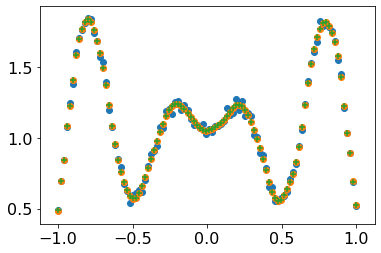

In [171]:
plt.figure()
plt.scatter(x, y)
plt.scatter(x, np.dot(coeffs_mp, poly.T))
plt.scatter(x, np.dot(coeffs_qr, poly.T), marker='+')

In [172]:
coeffs_qr = solve(rbf, y, method='qr')
coeffs_mp = solve(rbf, y, method='direct')

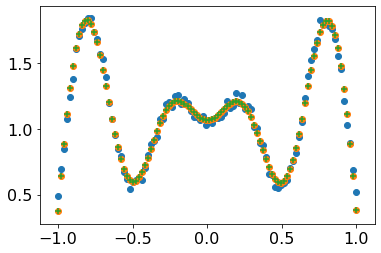

In [173]:
plt.figure()
plt.scatter(x, y)
plt.scatter(x, np.dot(coeffs_mp, rbf.T))
plt.scatter(x, np.dot(coeffs_qr, rbf.T), marker='+')

In [174]:
x_cont = np.linspace(-1,1,1000)
rbf_cont = make_rbf_basis(x_cont, np.linspace(-1,1,10), 0.3)

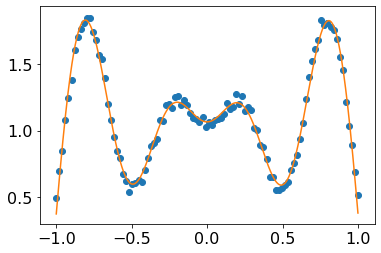

In [175]:
plt.figure()
plt.scatter(x, y)
plt.plot(x_cont, np.dot(coeffs_mp, rbf_cont.T), c='C1')

In [176]:
%%timeit
np.dot(coeffs_mp, rbf_cont.T)

2.11 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
# compare to validation set

In [186]:
rbf_val = make_rbf_basis(x_val, np.linspace(-1,1,10), 0.3)

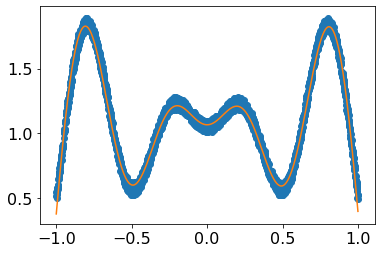

In [187]:
plt.figure()
plt.scatter(x_val, y_val)
plt.plot(x_val, np.dot(coeffs_mp, rbf_val.T), c='C1')

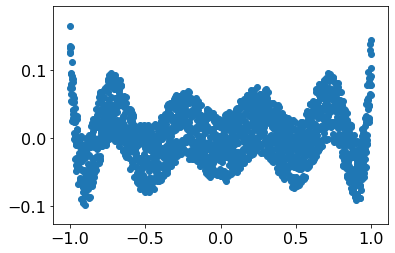

In [189]:
plt.figure()
plt.scatter(x_val, y_val - np.dot(coeffs_mp, rbf_val.T))

# support vector machine regressiong:

In [115]:
from sklearn.svm import SVR

In [199]:
clf = SVR(kernel='rbf', C=1, epsilon=0.01, gamma=100)
clf.fit(x, y)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=100,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

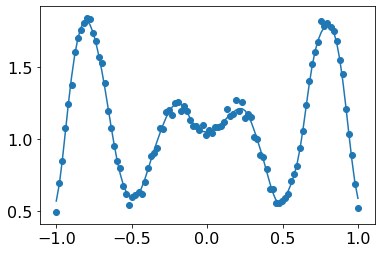

In [200]:
plt.figure()
plt.scatter(x, y)
plt.plot(x, clf.predict(x))

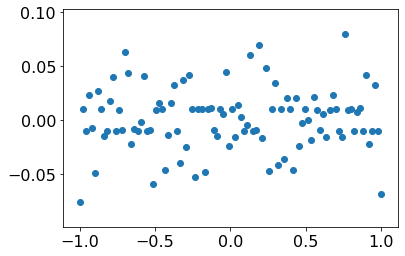

In [201]:
plt.figure()
plt.scatter(x, y - clf.predict(x))

In [202]:
%%timeit
clf.predict(x)

135 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [203]:
# validation set

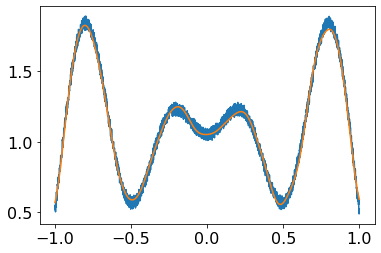

In [204]:
plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, clf.predict(x_val.reshape(-1, 1)))

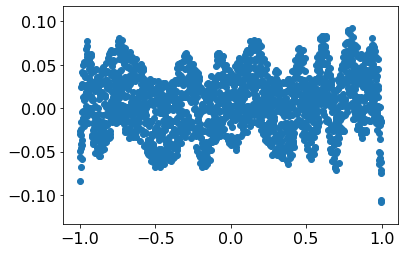

In [205]:
plt.figure()
plt.scatter(x_val, y_val - clf.predict(x_val.reshape(-1, 1)))